# Phase Contrast (PC) calculation tutorial

Start by importing the required libraries and defining some settings:

In [1]:
import os
from ukat.data import fetch
from ukat.vessels.phase_contrast import PhaseContrast

# Initialise output path for PC outputs
directory = 'phase_calculation_output'
os.makedirs(directory, exist_ok=True)
OUTPUT_DIR = os.path.join(os.getcwd(), directory)

Retrieve PC test data using our data fetcher. The first time the fetcher is run, it will download the data from the
internet, after that it will just use the cached local data.

This will return 5 variables:
* `magnitude`: a 3D array with the magnitude data at all trigger delay times (phase).
* `vel_array`: a 3D array with the phase data at all trigger delay times (phase).
* `affine`: the affine matrix for the data (needed to later write a new NIfTI file).
* `mask`: a 3D boolean matrix with the pixels to fit/calculate.
* `velocity_encoding`: returns a float values of the velocity encoding in cm/s

In [2]:
# Fetch test data
magnitude, vel_array, mask, affine, velocity_encoding = fetch.phase_contrast_left_philips()

Calculate velocity and Renal Blood Flow (RBF) parameters using the `PhaseContrast` class implemented in `vessels`:

In [3]:
# Initialise Phase Contrast calculation object
pc_obj = PhaseContrast(vel_array, affine, mask)

Plot the **velocity** and the **RBF** per trigger delay time (also known as phase).

Mean Velocity: 25.58 cm/sec
Mean RBF: 448.38 ml/min
Resistive Index: 0.609


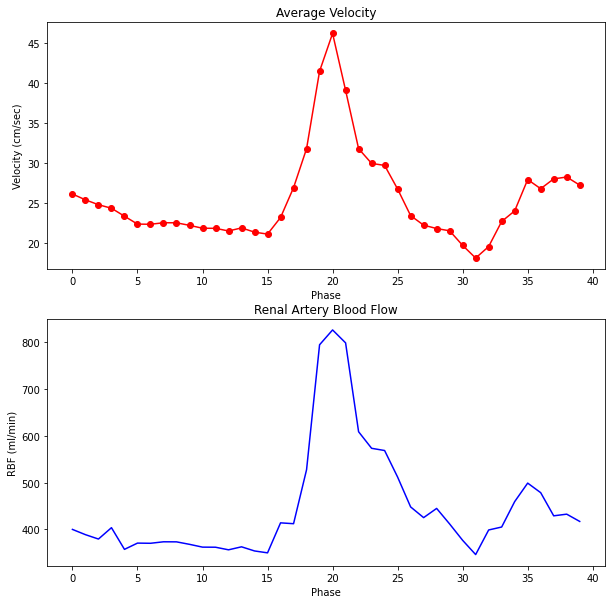

In [4]:
pc_obj.plot()

print(f"Mean Velocity: {pc_obj.mean_velocity_global:.2f} cm/sec")
print(f"Mean RBF: {pc_obj.mean_rbf:.2f} ml/min")
print(f"Resistive Index: {pc_obj.resistive_index:.3f}")

Print and save the output stats

In [5]:
# Print the stats_table
pc_obj.print_stats()
# Save the table with the results into a .csv file
csv_path = os.path.join(OUTPUT_DIR, "pc_left_output.csv")
pc_obj.to_csv (csv_path)

|    |   RBF (ml/min) |   Area (cm2) |   Nr Pixels |   Mean Vel (cm/s) |   Min Vel (cm/s) |   Max Vel (cm/s) |   StdDev Vel (cm/s) |
|----|----------------|--------------|-------------|-------------------|------------------|------------------|---------------------|
|  0 |        399.858 |        0.255 |      12.000 |            26.113 |           22.442 |           30.061 |               2.653 |
|  1 |        388.640 |        0.255 |      12.000 |            25.381 |           21.807 |           27.717 |               1.659 |
|  2 |        379.291 |        0.255 |      12.000 |            24.770 |           20.684 |           26.886 |               1.867 |
|  3 |        403.566 |        0.276 |      13.000 |            24.328 |           20.537 |           26.740 |               2.007 |
|  4 |        357.229 |        0.255 |      12.000 |            23.329 |           17.607 |           27.082 |               3.057 |
|  5 |        370.597 |        0.276 |      13.000 |            22.34